# Analysing the Tips Database using Seaborn #

## About Seaborn ##

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. [1] Seaborn is a data visualiisation librry that allows for the creation of elaborate visualisations in Python. High quality visualisations allow for the identifying of trend and building models. 

Here is some of the functionality that seaborn offers:
1. A dataset-oriented API for examining relationships between multiple variables
2. Specialized support for using categorical variables to show observations or aggregate statistics
3. Options for visualizing univariate or bivariate distributions and for comparing them between subsets of data
4. Automatic estimation and plotting of linear regression models for different kinds dependent variables
5. Convenient views onto the overall structure of complex datasets
6. High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
7. Concise control over matplotlib figure styling with several built-in themes
8. Tools for choosing color palettes that faithfully reveal patterns in your data [2]


In machine learning model while training any model you need to first find which features are important or on which features the result is dependent. This can be done using data analysis and data visualization.
We’ll learn how to visualize different types of data, and what we can infer from that plot, and when to use them.
Seaborn is a library built on matplotlib. It’s easy to use and can work easily with Numpy and pandas data structures.
We’ll be using inbuilt dataset provided by seaborn name tips. [3]

Exploratory Data Analysis (EDA) is an approach to analyzing datmanimasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models. [4]

As mentioned earlier visualisation repersentation is central to Seaborn. The plotting functiond operate on dataframes and arrays, allowing for the manipulation of whole datasets to produce informative plots. 

In [3]:
#Import libaries that will be used in this project #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Database ##

In [3]:
tips = sns.load_dataset("tips")  # opening the tips database and getting a general overview #
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Before undertaking any detailed examininations of data for the creation of plots, it is important to get a general overview of the dataset. The dataframe stores the data in grids and it can be viewed easily. From a quick look at the first few lines of the dataset, it can be seen that sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data. 

It is also beneficial to retrieve some common information such as min, max, unique and count for given numerical data.


## Univariate Plots ##

These plots are based on a single variable and show the frequency of uniques values of a given variable.

### Histogram ###

The histogram shows the frequency distribution for the total-bill data coloum in the dataset. The majority of the billd fall in into the 10 to 20 category



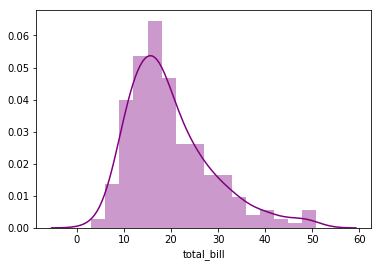

In [23]:
sns.distplot(tips["total_bill"], bins=16, color="purple")  #Binsize is calculated using square-root of row count.#

A better way to view the data is to use a histogram of subsets. The FacetGrid command makes this a very easy plot to create. 

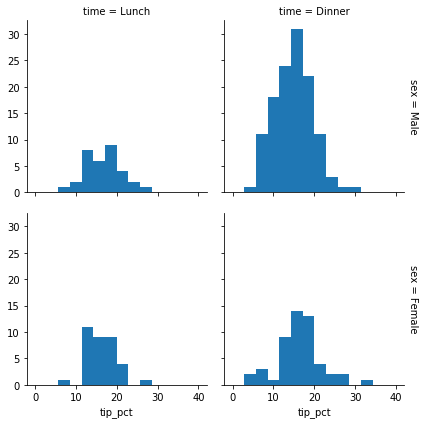

In [8]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))


It used  for univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset

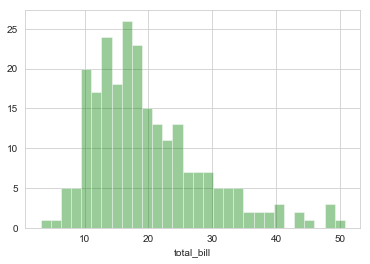

In [26]:
df = sns.load_dataset('tips')
sns.set_style('whitegrid') 
sns.distplot(df['total_bill'], kde = False, color ='green', bins = 30)

### Kerner Density Estimate (KDE)

A KDE plot can be used to have a closer look at the distribution of the variable e.g tip amount. 

C:\Users\Niamh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


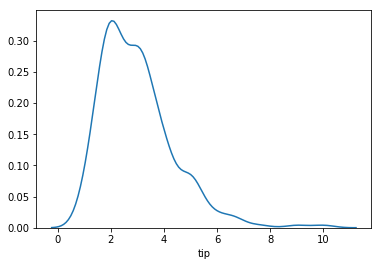

In [4]:
sns.distplot(tips['tip'],hist=False, bins=10);

### Barplot ###

A bar plot is used to plot the mean of a numerical column against all the unique values in a categorical column. For example, the bar plot below is a repersentation of the average amount that people spend during lunch and dinner. The average amount of the bills are higher at dinner, as would be expected.

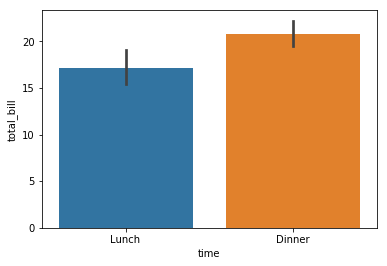

In [26]:
sns.barplot(x='time', y='total_bill', data=tips)

### Factorplot ###

The factor plot is used to plot multiple categorical columns against a single numerical column. For instance, to plot the average bill against the time of day, and then you want the time information further divided into whether the person who paid the bill smokes or not, you can use the factor plot as shown below

C:\Users\Niamh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


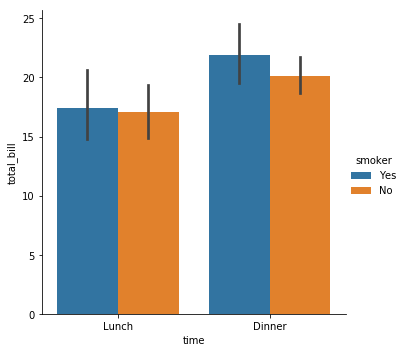

In [29]:
sns.factorplot("time", "total_bill", "smoker", data=tips, kind="bar")  


### Jointplot ##

Jointplots can be used to show the distribution of two viarables through the means of two different plots. The scatterplot and histogrtam joinplot shows a strong correlation between the total bill and the tip amount. 

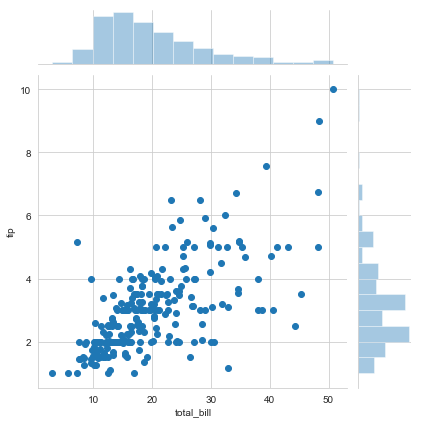

In [27]:
sns.jointplot(x ='total_bill', y ='tip', data = df) 

Using different types of jointplots can be used for a better visualisation of the data. For example a cpntour plot excellently shows the strongest areas for correlation. 

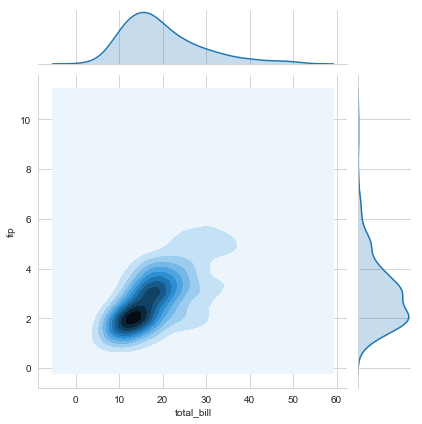

In [28]:

sns.jointplot(x ='total_bill', y ='tip', data = df, kind ='kde')

A hexagon jointplot shows the counts of observations that fall within a hexagonal bin. The darker colour of the hexagon suggests a high density of the data-points while the lighter colour signifies a lesser value points.

C:\Users\Niamh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


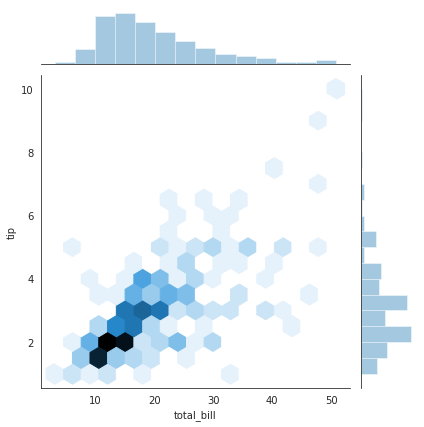

In [7]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

## Bivariate Plots ##

This type of plots is used when you need to find a relation between two variables and to find how the value of one variable changes the value of another variable. Different types of plots are used based on the data type of the variable.

### Scatterplot ###

Default plot type of relplot is scatterplot. It shows the relationship between two variables. So, if you need to find the correlation between two variables scatterplot can be used. 

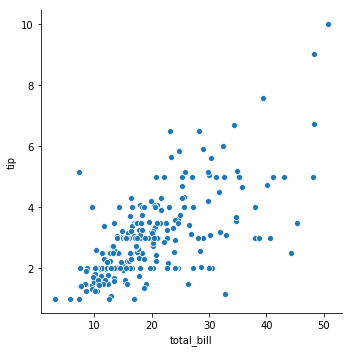

In [5]:
sns.relplot(x="total_bill", y="tip", data=tips);

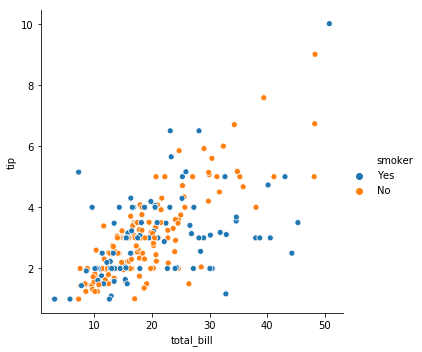

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

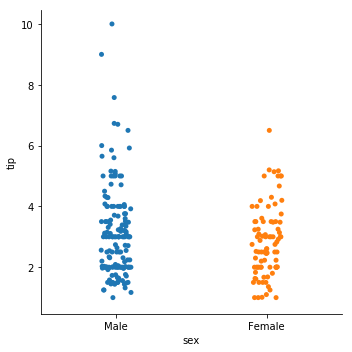

In [14]:
sns.catplot(x="sex", y="tip", data=tips);

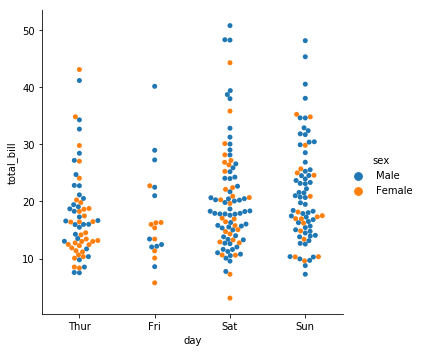

In [15]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

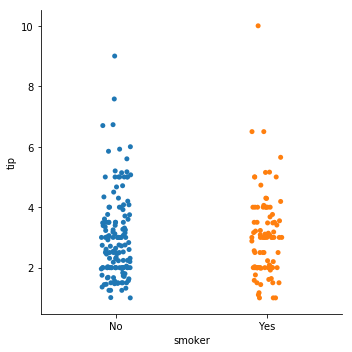

In [16]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

### Pairplots ###

Pairplots are an excellent way to show the relaionships between variables. Visually thet are very easy to understand. 

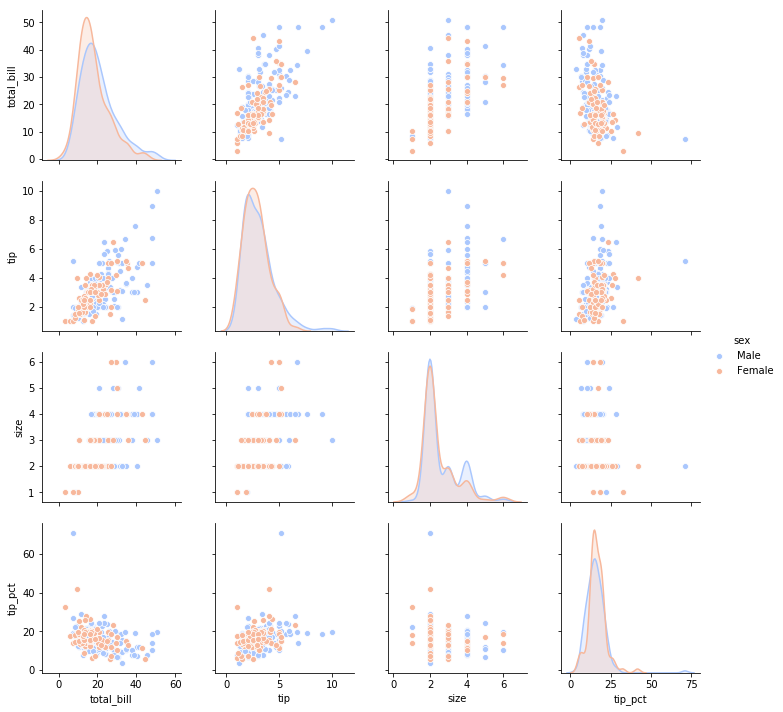

In [13]:
sns.pairplot(tips, hue ="sex", palette ='coolwarm') 

### Relational Plot ###

The relplot function provides access to several different axes-level functions that show the relationship between any two variables with semantic mappings of subset. [5] 

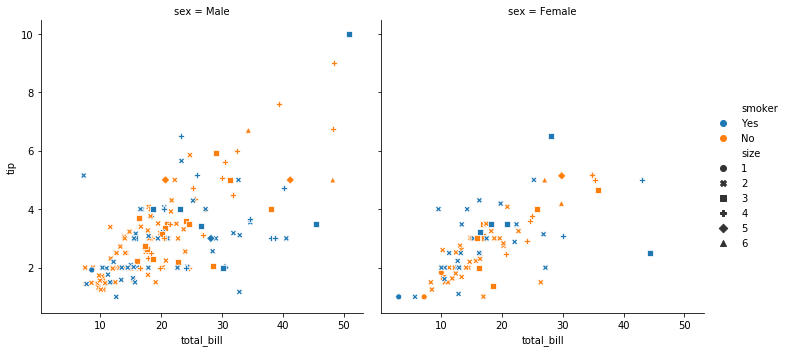

In [17]:
sns.relplot(x="total_bill", y="tip", col="sex",
          hue="smoker", style="size",
           data=tips)

### Lineplot ###

This plot is similar to the scatterplot but instead of dots, it displays the line joining all the dots by arranging the variable value represented on the x-axis. Below is an example of a line plot. The outputs shows that with the increase in the number of people in a group, the total of the bill inceases. This would be as expected, since a larger group would order more food items.


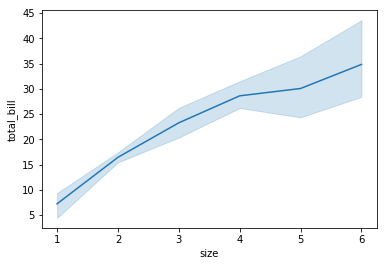

In [25]:
sns.lineplot(x="size", y="total_bill", data=tips)

### Boxplot ###

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that allows comparisons between variables or across levels of a categorical variable. 

The shaded box represents the values between 25-quartile and 75-quartile. The horizontal line in the shaded box shows the median. Two horizontal lines at the bottom and at the top represent the minimum, and the maximum value respectively. The dots represent the outliers calculated based on the inter-quartile function. Using these plots we can compare values for different categories in a single graph. From this boxplot it can be infered that the amount of total_bill is higher on weekends than weekdays.

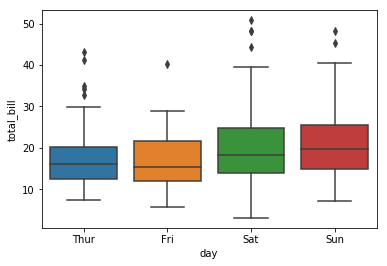

In [30]:
sns.boxplot(x = "day", y = "total_bill", data=tips)

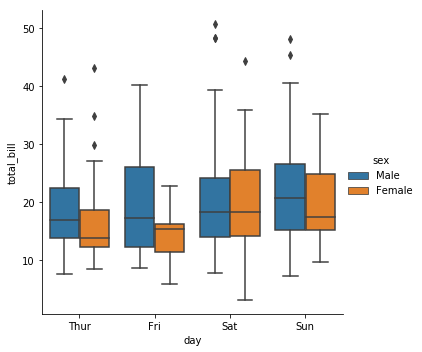

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips);

### Violin Plot ###

This plot is used to visualize the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Density Plot.On Friday we can see that female’s total_bill is much less than male’s total_bill.


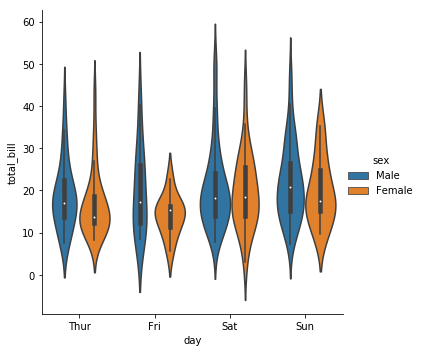

In [12]:
sns.catplot(x="day", y="total_bill", hue="sex",
kind="violin", data=tips);

### Point Plot ###

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars. Point plot shows only mean values and error rate surrounding those mean values. They are not very much informative but are easy to find the change in a variable based on different categories.

The total_bill is rising for male’s as the weekend arises while it decreases on Friday for females and jumps on Saturday and remains mostly constant on Sunday.

These plots can be used for various data analysis and we can infer information regarding relations between different variables and can help to extract more significant features from the dataset.


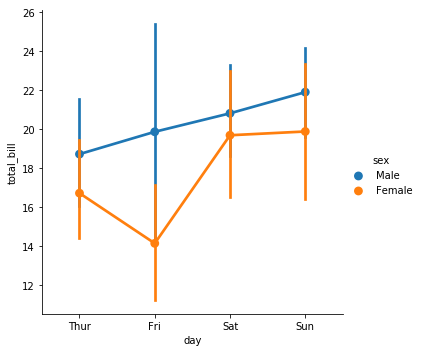

In [13]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="point", data=tips);

### Heatmap ###

A heat map is a matrix-like plot used to plot the degree of correlation between multiple numerical columns. The heatmap function of the Seaborn library is used to plot heatmaps. The heatmaap function accepts a dataframe with columns as well as row headers. The tips dataset only contains column headers. To create row headers, you can use the corr() function, which returns the dataset with both column and row headers. You can then use the heatmap function to plot the heatmap for the dataset as shown below.

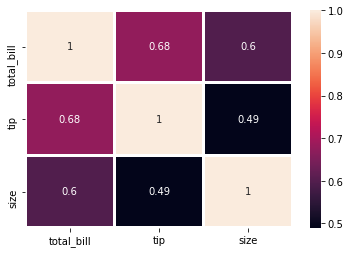

In [4]:
import seaborn as sns

sns.heatmap(tips.corr(),linecolor='white',linewidths=2,annot=True)

## Regression ##


The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships. This article deals with those kinds of plots in seaborn and shows the ways that can be adapted to change the size, aspect, ratio etc. of such plots. [6]

Regression plots in seaborn can be easily implemented with the help of the lmplot function. lmplot can be understood as a function that basically creates a linear model plot. lmplot makes a very simple linear regression plot.It creates a scatter plot with a linear fit on top of it.

Linear regression attempts to predict one dependent variable (y) and a series of other changing variables (x). Linear regession is a way of predicting a response y on the nasis of a single predictor viable x. 


C:\Users\Niamh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


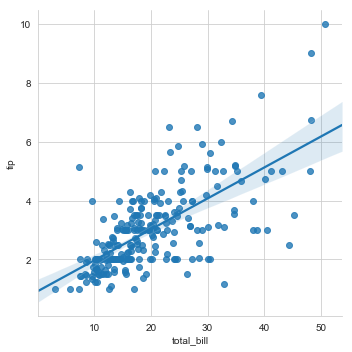

In [15]:
sns.set_style('whitegrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips)

It can be seen in this example that there is a correlation between the lower total bill cost ad the size of the tip. Plotting a regression line, aids in vizualisation display of the strenght of correlation.

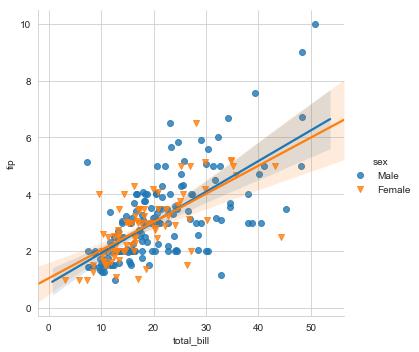

In [16]:
sns.set_style('whitegrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips,  
           hue ='sex', markers =['o', 'v']) 

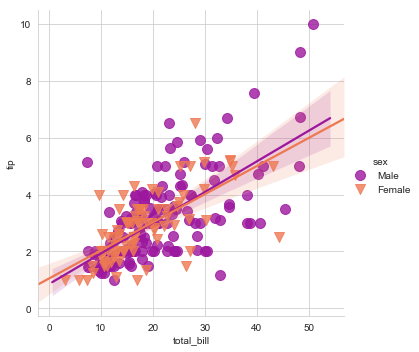

In [17]:
sns.set_style('whitegrid') 
sns.lmplot(x ='total_bill', y ='tip', data = tips, hue ='sex',  
           markers =['o', 'v'], scatter_kws ={'s':100},  
           palette ='plasma')

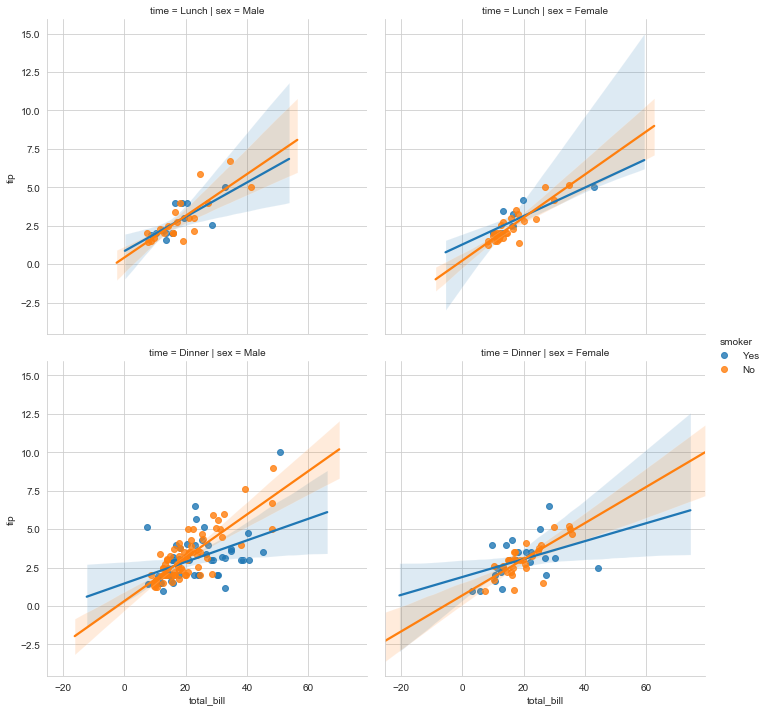

In [18]:
sns.lmplot(x ='total_bill', y ='tip', data = tips,  
           col ='sex', row ='time', hue ='smoker')

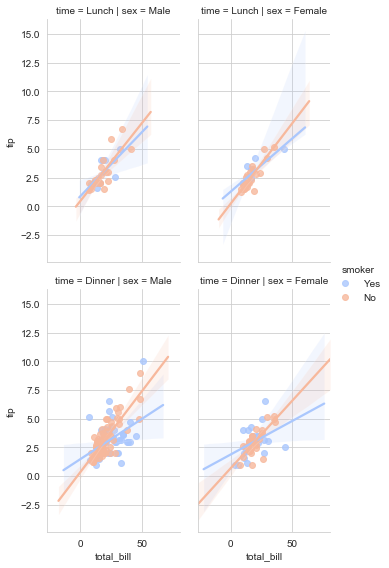

In [20]:
sns.lmplot(x ='total_bill', y ='tip', data = tips, col ='sex',  
           row ='time', hue ='smoker', aspect = 0.6,  
           height = 4, palette ='coolwarm')

In the above code, we draw multiple plots by specifying a separation with the help of the rows and columns. Each row contains the plots of tips vs the total bill for the different times specified in the dataset. Each column contains the plots of tips vs the total bill for the different genders. A further separation is done by specifying the hue parameter on the basis of whether the person smokes. [7]

Suppose we have a large number of plots in the output, we need to set the size and aspect for it in order to better visualize it.
aspect : scalar, optional specifies the aspect ratio of each facet, so that “aspect * height” gives the width of each facet in inches. [8]

### Machine Learning and Linear Regression ##

Linear regression is a very simple supervised machine learning algorithm - we have data (x,y) with linear relationship, we wanr ro predict unknown y vakues for given x. [9] Before a machine learning model can be built, all text values need to be converted in numbers. 

In [31]:

df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


The values in day column are: Thursday, Friday and Sunday. These need to be converted to numbers. Converting the column into four columns, one for each day with 0 or 1 as values. This can be done in the pandas library by using get_dummies.

In [32]:
days=pd.get_dummies(df['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
195,1,0,0,0
11,0,0,0,1
215,0,0,1,0
10,0,0,0,1
173,0,0,0,1


In [34]:
days=pd.get_dummies(df['day'],drop_first=True)
df = pd.concat([df,days],axis=1)
times=pd.get_dummies(df['time'],drop_first=True)
df = pd.concat([df,times],axis=1)
df.drop(['day','time'],inplace=True,axis=1)
df.head()

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,1,0,2,0,0,1,1
1,10.34,1.66,0,0,3,0,0,1,1
2,21.01,3.50,0,0,3,0,0,1,1
3,23.68,3.31,0,0,2,0,0,1,1
4,24.59,3.61,1,0,4,0,0,1,1


Once the data is cleaned. A linear regression model can be built. Firstly, create a list of features as x an predicted as y. 

In [35]:

X = df[['sex','smoker','size','Fri','Sat','Sun','Dinner']]
Y = df[['tip']]

It is important to test the data. The data can be split into test and train, for example a 70% - 30% split. 

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

The model needs to be trained with x_traing and y_train.

In [37]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Run a rediction on the x_test values. A closer look at the predictions can be done and compared with y_test. 

In [38]:

predictions=model.predict(X_test)

A graph can be drawn to show a visual repersentation of the difference distribution. 

C:\Users\Niamh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


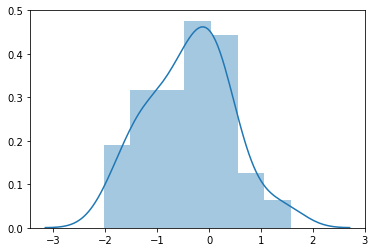

In [39]:
sb.distplot(y_test-predictions)

## Conclusion ##

1. https://seaborn.pydata.org/introduction.html
2. https://seaborn.pydata.org/introduction.html
3. https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
4. https://dev.to/nexttech/how-to-perform-exploratory-data-analysis-with-seaborn-29eo
5. https://analyticsindiamag.com/a-simple-introduction-to-pythons-seaborn-library/
6. https://www.geeksforgeeks.org/seaborn-regression-plots/
7. https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
8. https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
9. https://devarea.com/python-machine-learning-example-linear-regression/#.Xdk7UOj7TD4